In [2]:
from datasets import load_dataset

/home/swq/miniconda3/envs/Qwen25vl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

# 下载数据集
ds = load_dataset("UCSC-VLAA/MedTrinity-25M", "25M_demo", cache_dir="cache", token=True)


In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'id', 'caption'],
        num_rows: 161630
    })
})

In [6]:
ds['train']

Dataset({
    features: ['image', 'id', 'caption'],
    num_rows: 161630
})

In [3]:
print(ds['train'][:1]) 

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x757A54BC7B10>], 'id': ['8031efe0-1b5c-11ef-8929-000066532cad'], 'caption': ['The image is a non-contrasted computed tomography (CT) scan of the brain, showing the cerebral structures without any medical devices present. The region of interest, located centrally and in the middle of the image, exhibits an area of altered density, which is indicative of a brain hemorrhage. This area is distinct from the surrounding brain tissue, suggesting a possible hematoma or bleeding within the brain parenchyma. The location and characteristics of this abnormality may suggest a relationship with the surrounding brain tissue, potentially causing a mass effect or contributing to increased intracranial pressure.']}


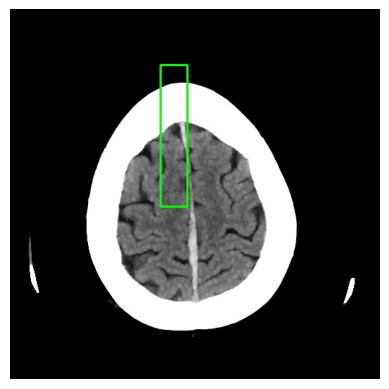

In [4]:
# 可视化image内容
from PIL import Image
import matplotlib.pyplot as plt

image = ds['train'][0]['image']  # 获取第一张图像

plt.imshow(image)
plt.axis('off')  # 不显示坐标轴
plt.show()


In [13]:
from datasets import load_dataset
import os
import json

from tqdm import tqdm
from PIL import Image

def save_images_and_json(ds, output_dir="mllm_data"):
    """
    将数据集中的图像和对应的 JSON 信息保存到指定目录。

    参数:
    ds: 数据集对象，包含图像和标题。
    output_dir: 输出目录，默认为 "mllm_data"。
    """
    # 创建输出目录
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 创建一个列表来存储所有的消息和图像信息
    all_data = []
    
    # 如果数据集很大，可以只处理前一部分
    data_length = min(20000, len(ds))
    
    # 遍历数据集中的每个项目
    for item in tqdm(ds, total=data_length, desc="Processing images", unit="image"):
        
        # 已经处理数据达最大时停止循环
        if len(all_data) >= data_length:
            break
        
        img_path = f"{output_dir}/{item['id']}.jpg"  # 图像保存路径
        image = item["image"]  # 假设这里是一个 PIL 图像对象

        # 将图像对象保存为文件
        image.save(img_path)  # 使用 PIL 的 save 方法

        # 添加消息和图像信息到列表中
        all_data.append(
            {
                "messages": [
                    {
                        "content": "<image>图片中的诊断结果是怎样?",
                        "role": "user",
                    },
                    {
                        "content": item["caption"],  # 从数据集中获取的标题
                        "role": "assistant",
                    },
                ],
                "images": [img_path],  # 图像文件路径
            }
        )

    # 创建 JSON 文件
    json_file_path = f"{output_dir}/mllm_data.json"
    
    with open(json_file_path, "w", encoding='utf-8') as f:
        json.dump(all_data, f, ensure_ascii=False)  # 确保中文字符正常显示


In [15]:
# 保存数据集中的图像和 JSON 信息
save_images_and_json(ds['train'])

Processing images: 100%|██████████| 20000/20000 [00:36<00:00, 554.66image/s]
